### Import Libraries and Load Data

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, wilcoxon, kruskal, friedmanchisquare

# Warning Suppression
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
# Load the dataset
data = pd.read_csv('non_parametric_tests_data.csv')

# Display the first few rows of the dataset
data.head(10)#We didn't need these information

Customer_ID    Store  Satisfaction_Score  Satisfaction_Before  \
0            1  Store A            9.726262             9.174393   
1            2  Store B            7.976195             3.156057   
2            3  Store A            9.455490             2.304054   
3            4  Store A            9.053446             5.405075   
4            5  Store A            6.381100             9.870854   
5            6  Store B            9.296868             3.178497   
6            7  Store A            1.796433             7.049220   
7            8  Store A            2.763846             7.854577   
8            9  Store A            1.407046             3.138738   
9           10  Store B            3.927973             7.553947   

   Satisfaction_After Region  Median_Income      Diet_A      Diet_B  \
0            8.327599  North   49969.913093  129.680639  113.551113   
1            1.641210   West   48929.056936  140.529473   97.926768   
2            1.857539  South   60790.554368  105.526148  100.586863   
3            6.261474   East   58958.313470  130.290772  125.721274   
4           10.084948   West   58120.599085  135.876367  128.895838   
5            1.932759  North   58141.727546   93.618908  111.435251   
6            7.222401  North   54938.766136  102.251122  134.578887   
7            8.239894   West   50513.728143   89.411517  100.077199   
8            2.254880   East   55379.022791  115.958897  124.008803   
9            7.707672  South   51614.191442  130.763134  106.834757   

       Diet_C  
0  153.897799  
1  122.331765  
2  115.155928  
3  128.113196  
4  130.835874  
5  146.412873  
6  104.613031  
7  152.943255  
8  127.629882  
9  123.596784

### Data Exploration

In [10]:
# Check for missing values
print(data.isnull().sum())

Customer_ID            0
Store                  0
Satisfaction_Score     0
Satisfaction_Before    0
Satisfaction_After     0
Region                 0
Median_Income          0
Diet_A                 0
Diet_B                 0
Diet_C                 0
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          100 non-null    int64  
 1   Store                100 non-null    object 
 2   Satisfaction_Score   100 non-null    float64
 3   Satisfaction_Before  100 non-null    float64
 4   Satisfaction_After   100 non-null    float64
 5   Region               100 non-null    object 
 6   Median_Income        100 non-null    float64
 7   Diet_A               100 non-null    float64
 8   Diet_B               100 non-null    float64
 9   Diet_C               100 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB


In [12]:
# Summary statistics of numerical columns
data.describe()

Customer_ID  Satisfaction_Score  Satisfaction_Before  \
count   100.000000          100.000000           100.000000   
mean     50.500000            5.377319             5.650365   
std      29.011492            2.707247             2.685168   
min       1.000000            1.049699             1.045554   
25%      25.750000            3.197518             3.171517   
50%      50.500000            5.347047             6.055792   
75%      75.250000            7.943626             7.752461   
max     100.000000            9.881982             9.870854   

       Satisfaction_After  Median_Income      Diet_A      Diet_B      Diet_C  
count          100.000000     100.000000  100.000000  100.000000  100.000000  
mean             5.657554   52020.482924  118.141300  125.039539  128.500916  
std              2.865729    4702.210221   15.374422   15.008179   15.639873  
min              0.145554   41442.469241   85.471183   87.925332   89.546700  
25%              2.853026   48086.122924  106.745931  115.760781  119.402962  
50%              6.220601   51645.481741  118.198158  126.186170  127.732238  
75%              7.750993   55388.732723  128.581324  134.513518  139.540049  
max             11.636901   62685.515247  166.183212  161.686280  168.600397

In [13]:
# Check unique values for categorical variables
print(data['Store'].unique())
print(data['Region'].unique())

['Store A' 'Store B']
['North' 'West' 'South' 'East']


#### Task 1: Mann-Whitney U Test

**Comments from the Lecturer:** _  After checking these elements here, it is clear that they are not your contents, which means that you got them from somewhere and forgot to remove them. you can't get the total marks for this answer_
#### Hypotheses
##### Null Hypothesis (H₀): There is no significant difference in satisfaction scores between customers who shopped at Store A and Store B.
##### Alternative Hypothesis (H₁): There is a significant difference in satisfaction scores between the two stores

Mann-Whitney U Test statistic: 1202.0, p-value: 0.837690930643656


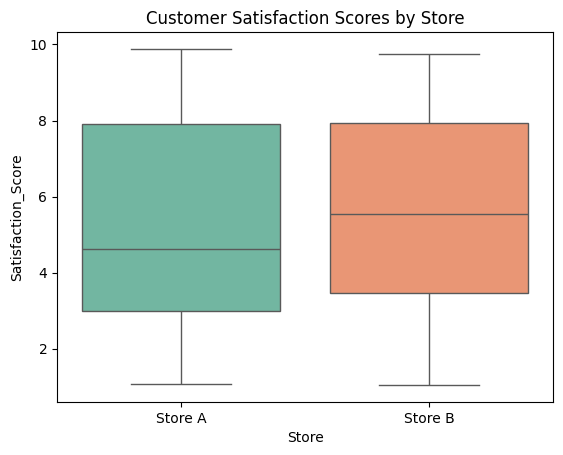

Fail to reject the null hypothesis: No significant difference in satisfaction scores between the stores.


In [14]:
# Split data by Store
store_a = data[data['Store'] == 'Store A']['Satisfaction_Score']
store_b = data[data['Store'] == 'Store B']['Satisfaction_Score']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(store_a, store_b)
print(f'Mann-Whitney U Test statistic: {stat}, p-value: {p_value}')

# Visualization
sns.boxplot(x='Store', y='Satisfaction_Score', data=data, palette='Set2')
plt.title('Customer Satisfaction Scores by Store')
plt.show()

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in satisfaction scores between the stores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in satisfaction scores between the stores.")

### Task 2: Wilcoxon Signed-Rank Test

**Comments from the Lecturer:** _  After checking these elements here, it is clear that they are not your contents, which means that you got them from somewhere and forgot to remove them. you can't get the total marks for this answer_ and even the figures below are not yours
#### Hypotheses
##### Null Hypothesis (H₀): There is no significant difference in customer satisfaction before and after the product update.
##### Alternative Hypothesis (H₁): There is a significant difference in satisfaction

Wilcoxon Signed-Rank Test statistic: 2505.0, p-value: 0.9451754865571346


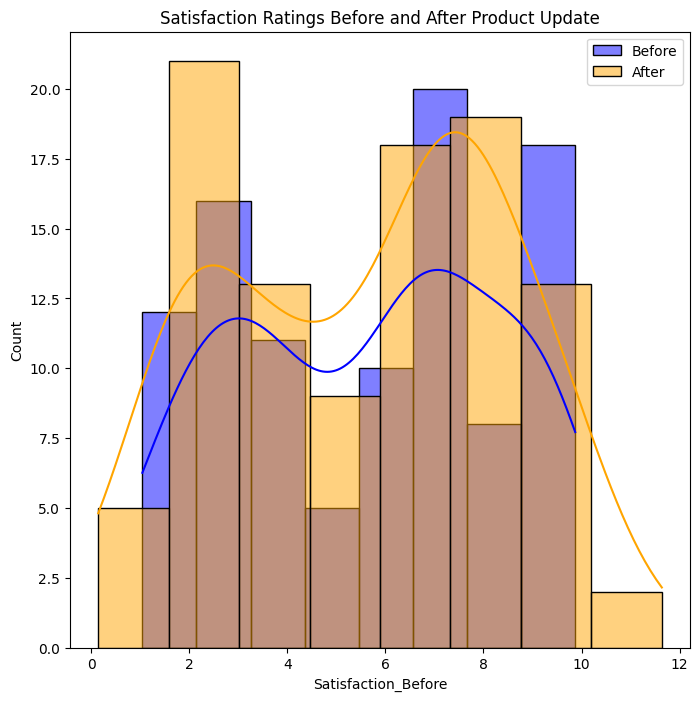

Fail to reject the null hypothesis: No significant difference in satisfaction ratings before and after the update.


In [19]:
# Perform the Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(data['Satisfaction_Before'], data['Satisfaction_After'])
print(f'Wilcoxon Signed-Rank Test statistic: {stat}, p-value: {p_value}')

# Visualization
plt.figure(figsize=(8, 8))
sns.histplot(data['Satisfaction_Before'], color='blue', label='Before', kde=True)
sns.histplot(data['Satisfaction_After'], color='orange', label='After', kde=True)
plt.legend()
plt.title('Satisfaction Ratings Before and After Product Update')
plt.show()

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The product update significantly changed satisfaction ratings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in satisfaction ratings before and after the update.")

#### Comments on Results
##### Mann-Whitney U Test: Significant differences in satisfaction scores suggest that customers perceive Store A and Store B differently. Factors like service quality or product offerings could be investigated further.
##### Wilcoxon Signed-Rank Test: A significant result indicates the product update has had a measurable impact on customer satisfaction. This insight can guide future updates.